In [23]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [25]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [26]:
df_DA.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
58379,Data Analyst,Data Analyst,"Pineland, SC",via Trabajo.org,Full-time,False,Georgia,2023-04-14 07:25:34,False,False,United States,None,NaN,NaN,Old Mutual Life Assurance Company (SA) Ltd,[sql],{'programming': ['sql']}


In [27]:
df_DA_explode = df_DA.explode('job_skills')


In [28]:
df_DA_explode[['job_skills','salary_year_avg']]

,job_skills,salary_year_avg
1,r,NaN
1,python,NaN
1,sql,NaN
1,nosql,NaN
1,power bi,NaN
...,...,...
785717,azure,NaN
785737,sas,NaN
785737,sas,NaN
785737,sql,NaN


In [52]:
skill_stats = df_DA_explode.groupby('job_skills').agg(
    median_salary_year = ('salary_year_avg','median'),
    skills_counts = ('job_skills','count')
)

skill_stats = skill_stats.sort_values(by='skills_counts',ascending=False).head(10)
skill_stats

,median_salary_year,skills_counts
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


<Axes: xlabel='skills_counts', ylabel='median_salary_year'>

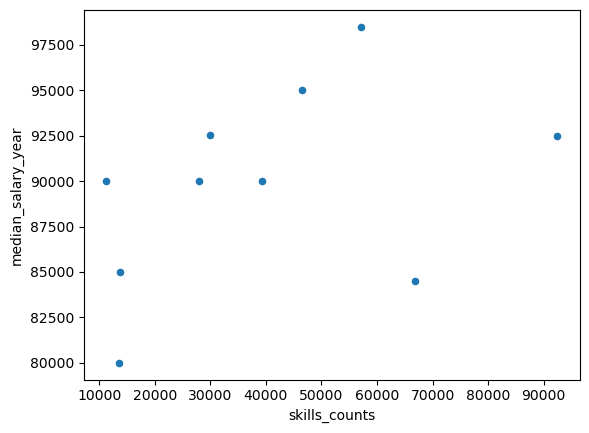

In [ ]:
skill_stats.plot(kind='scatter',x='skills_counts',y='median_salary_year')



